# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
pd.options.display.float_format = '{:.2f}'.format
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns')

There are 1898 rows and 9 columns


#### Observations:

There are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* Order_ID datatype is an interger.
* Customer_Id data type is an Interger.
* Restaurant_name datatype is an object.
* Cuisine_type column data type is object.
* Cost_of_the_order data type is float.
* Day_of_the_week data type is object.
* Rating data type is an object, this should rather be in float, however due to some data being entered as 'not given',this has caused the data type to be represented as an object rather than as an interger.
* food_preparation_time datatype is interger
* delivery_time datatype is interger.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking missing values across each columns
print(df.isnull().sum())





order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64



#### Observations:

* There are no missing values in any of the 9 columns in the dataset.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statiscal summary of data set
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

* It takes a minimum of 20 minutes for food to be prepared ones an order has been placed.
* On an average, it takes 20.4 minutes for food to be prepared ones an order has placed.Its worthy to note that the average food preparation time is slightly less than the median food preparation time of 27 minutes, this could imply that the data on the preparation time is slightly skewed to the left.

*  The maximum time it took to prepare meals after an order is placed is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Checking why ratings column is recognized as object and check also for count of data types in ratings column.

print(df['rating'].unique())
print('\n')
df['rating'].apply(type).value_counts()

['Not given' '5' '3' '4']




<class 'str'>    1898
Name: rating, dtype: int64

In [76]:
# Checking total number of orders not rated
object_counts = df['rating'].apply(lambda x: str(x) if isinstance(x, (str, object)) else None).value_counts()

# Display the counts of each unique object
print("Object Counts:")
print(object_counts)

Object Counts:
nan    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64


In [ ]:
# replacing 'Not given' with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# changing rating data type to float
df['rating'] = df['rating'].astype(float)

In [ ]:
# Rechecking 'Rating' column for object values
print(df['rating'].unique())
print('\n')
df['rating'].apply(type).value_counts()

[nan  5.  3.  4.]




<class 'float'>    1898
Name: rating, dtype: int64

In [ ]:

# Checking the datatypes and Statistical summary again
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   Total_time_required    1898 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 148.4+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.00,NaN,NaN,NaN,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00
Total_time_required,1898.00,NaN,NaN,NaN,51.53,6.83,35.00,47.00,52.00,56.00,68.00


#### Observations:

* There are 736 of 1898 orders not rated represented in the data set. They are represented as 'Not given' in the rating column of the data set.
* Since the orders not rated Inputted as 'Not given' is interpreted as an object by python thus affecting the entire data type of the rating column, it is important I change 'not given' to Nan and also change the data type of the rating column to float. This is to ensure that the statistical properties of the rating column is not mis-represented.
* Statistical summary data for rating has been updated to reveal previously unavailable summaries as result of the changes made.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Analysis of Restaurant Names against Orders

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


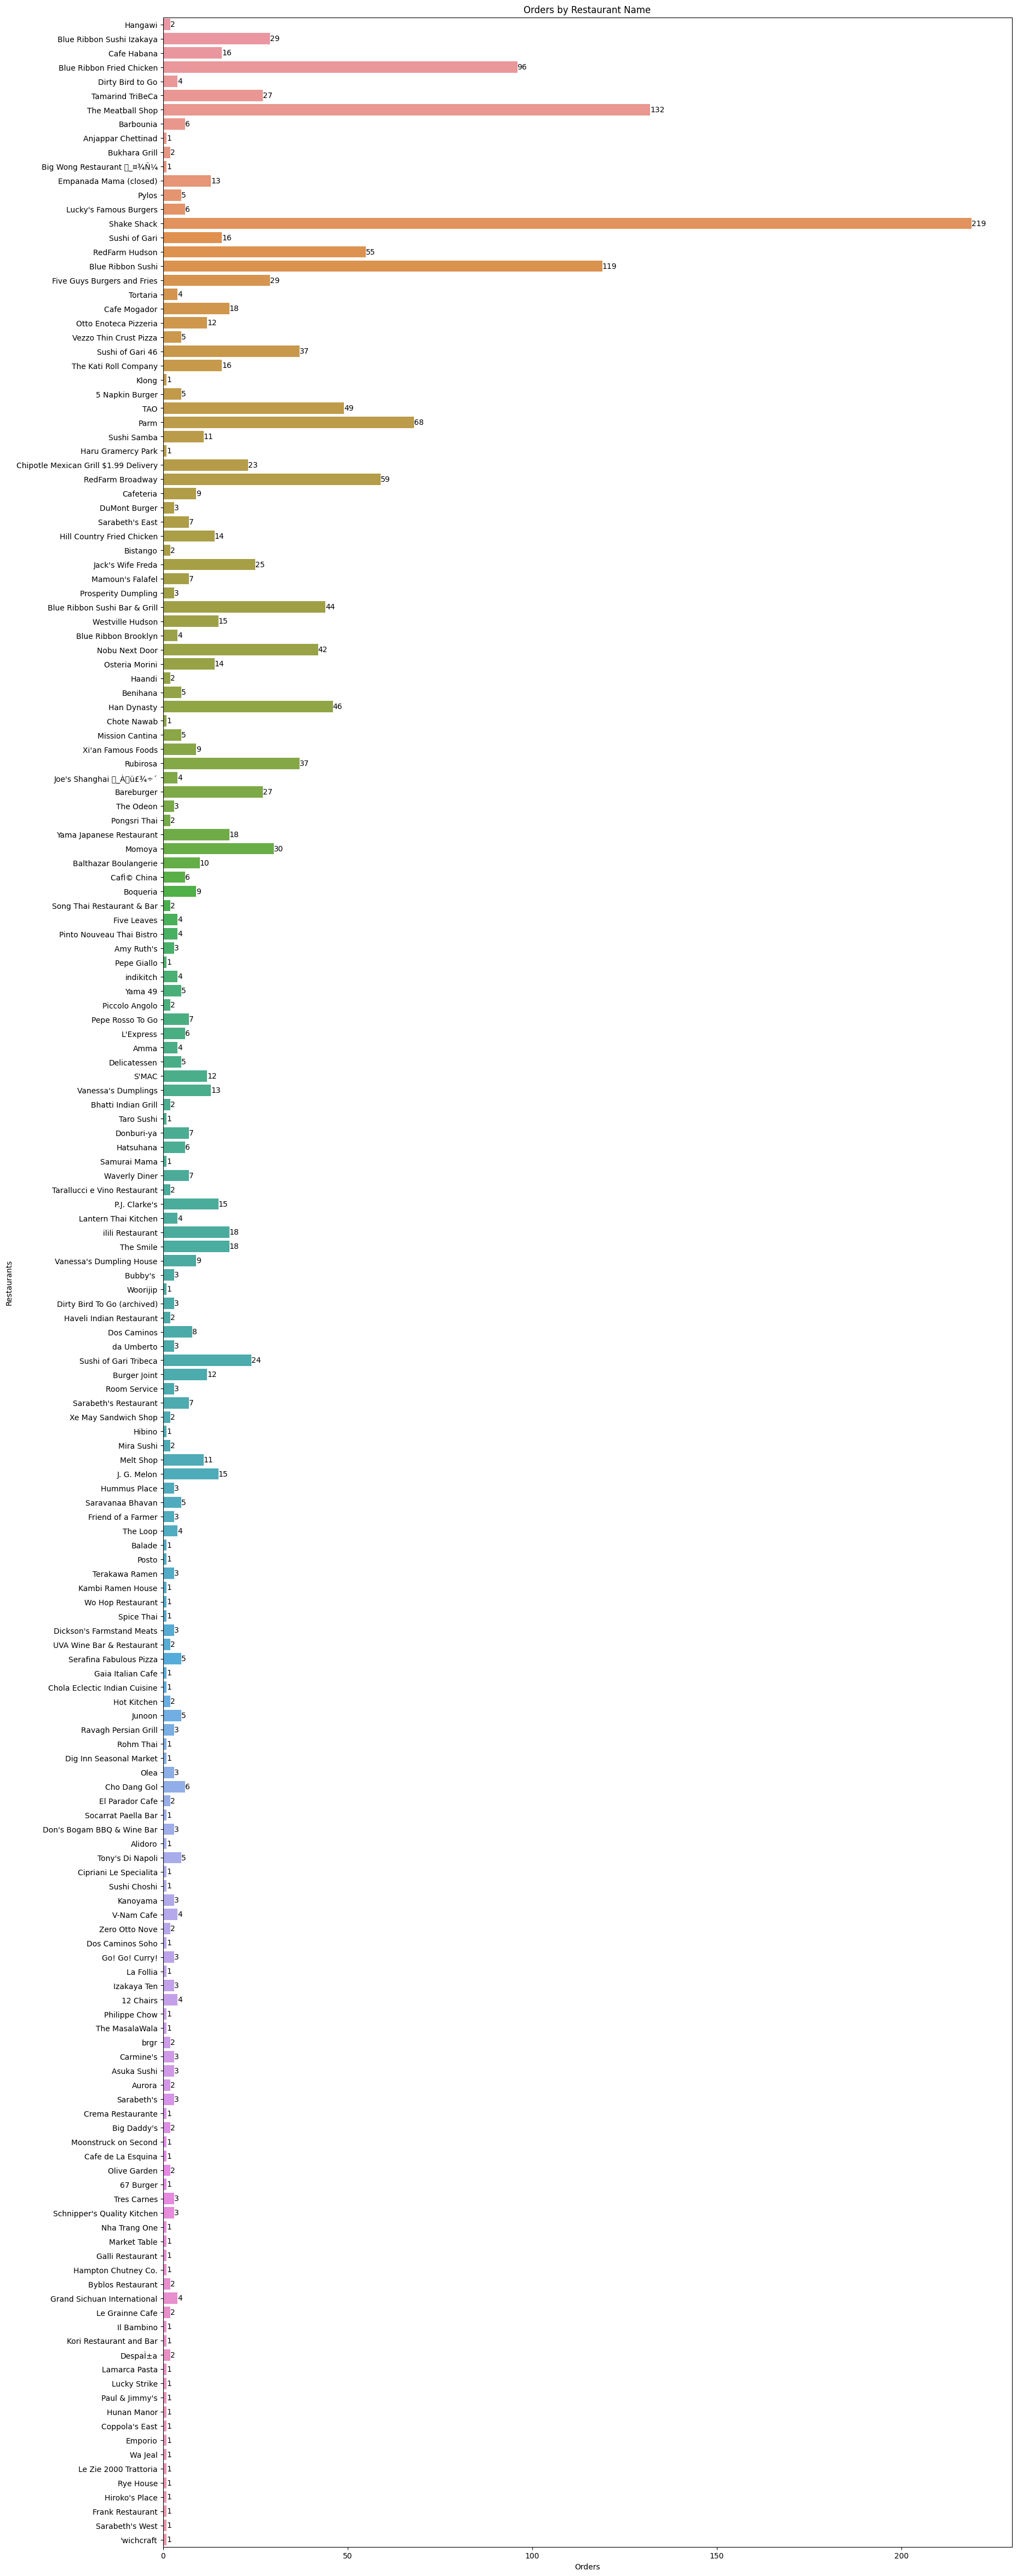

In [ ]:

# Plotting a barchart of restaurant_name
plt.figure(figsize=(20, 60))

# Add count values on top of each bar
RN = sns.countplot(data=df, y='restaurant_name')
plt.xlabel('Orders')
plt.ylabel('Restaurants')
plt.title('Orders by Restaurant Name')

# Add count values on top of each bar
for i, v in enumerate(RN.patches):
    RN.text(v.get_width(), i, str(int(v.get_width())), va='center')

plt.show()

##### Observations
* Shack Shack, The Meatball shop, and Blue Ribbon Sushi where the only Restaurants to receive over 100 orders. This implies they were the top 3 favourite restaurants.
* When carrying out my multivariate analysis, I will probe further to know why they were the favourites.

#### Analysis of Cuisine types against Orders

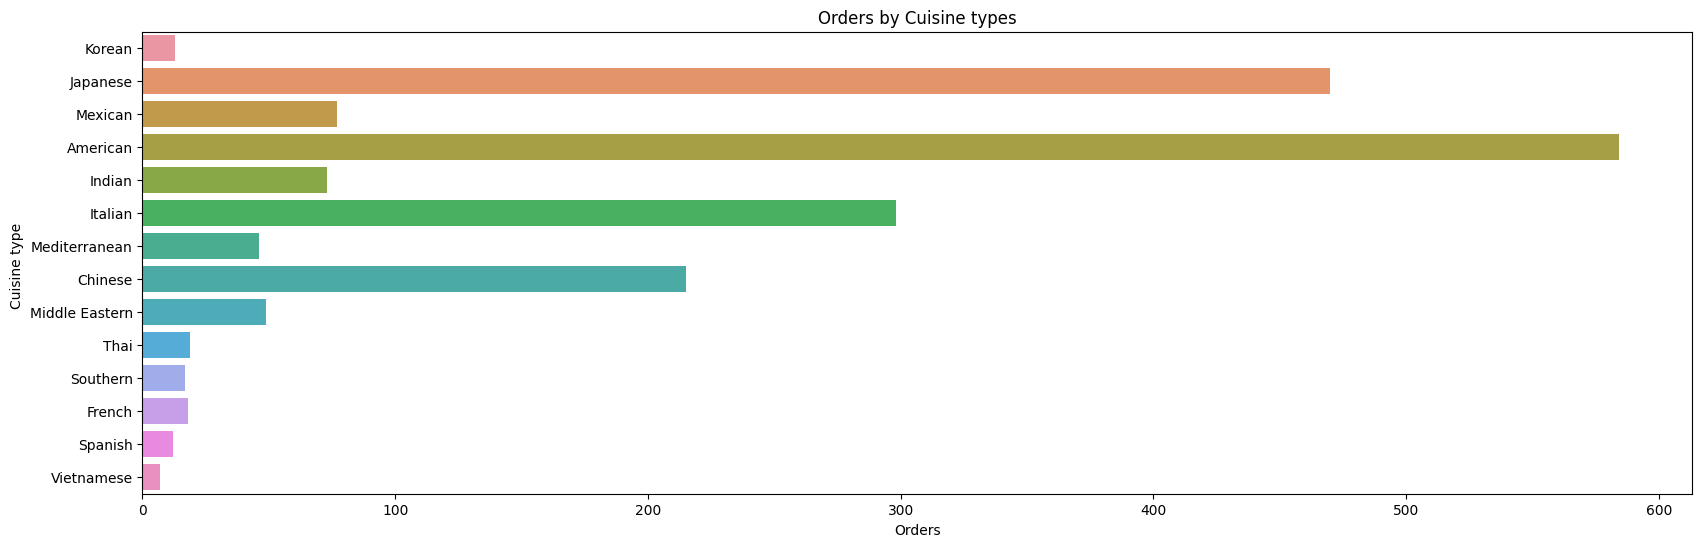

In [ ]:
# Plotting a barchart of cuisine_type
plt.figure(figsize=(20,6))
sns.countplot(data= df, y='cuisine_type')
plt.xlabel('Orders');
plt.ylabel('Cuisine type ');
plt.title('Orders by Cuisine types')
plt.show()

##### Observations

* American, Japenese, and Italian cuisines were the top 3 requested cuisines respectively by orders received.
* Vietnamese Cusines was the least requested cuisines.

#### Analysis of Cost_of_orders against Orders

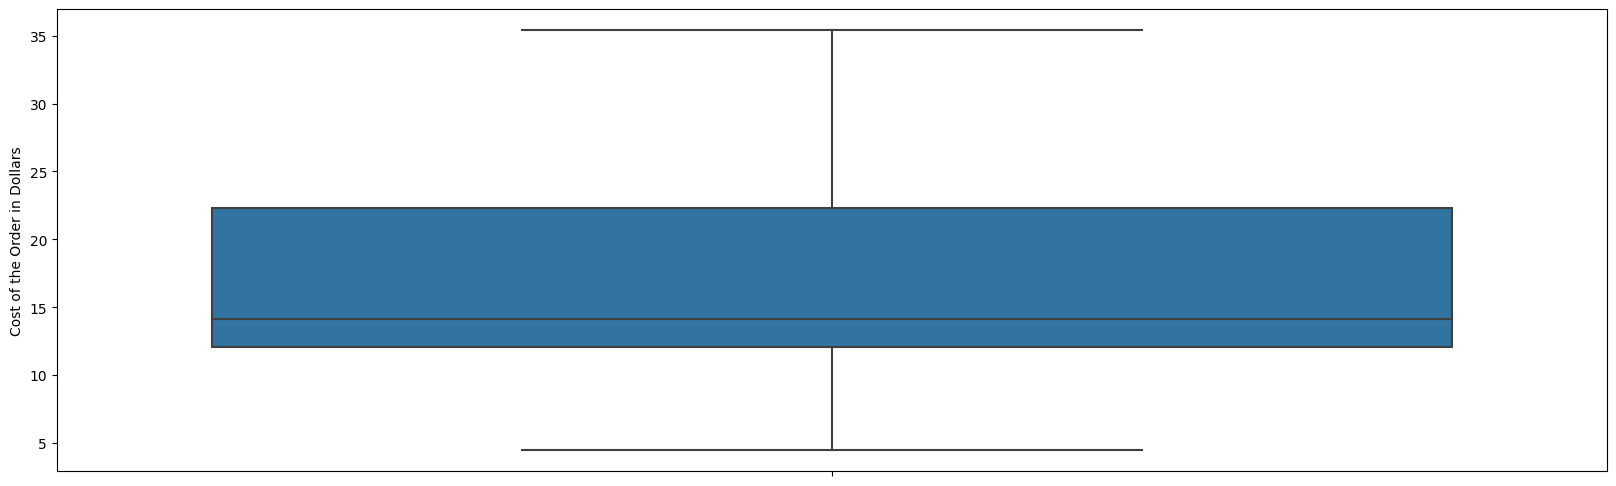

In [ ]:
# Plotting a boxplot of cost_of_the_order
plt.figure(figsize=(20,6))
sns.boxplot(data= df, y='cost_of_the_order')
plt.ylabel('Cost of the Order in Dollars')
plt.show()

##### Observations

* Data for cost of orders are slightly skewed to the right.
* The Median cost of orders is around 14 dollars.
* 75% OF cost of orders were above 23 dollars.
* There are no outliers.
* 23% of cost of orders were below 12 dollars.


#### Analysis of Days_of_the_week orders were made against Orders

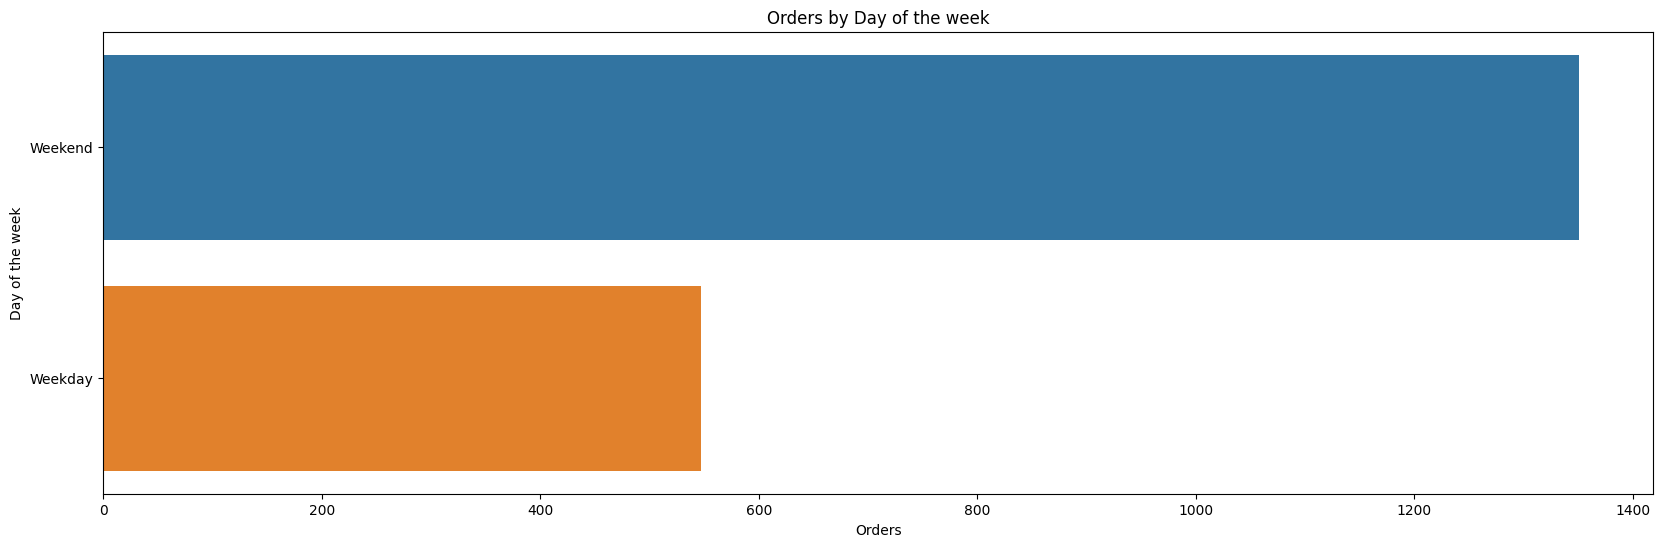

In [ ]:
# Plotting a barplot of distribution of day_of_the_week orders were made.
plt.figure(figsize=(20,6))
sns.countplot(data= df, y='day_of_the_week')
plt.xlabel('Orders');
plt.ylabel('Day of the week');
plt.title('Orders by Day of the week')
plt.show()

##### Observations

* Weekends attracts almost 3 times the number of orders compared to weekdays.
* This might imply customers tend to order more food during the weekends because they tend to be at home these period and are more likely to socialize with friends and families over their favourite meals.

#### Analysis of Rating against Orders

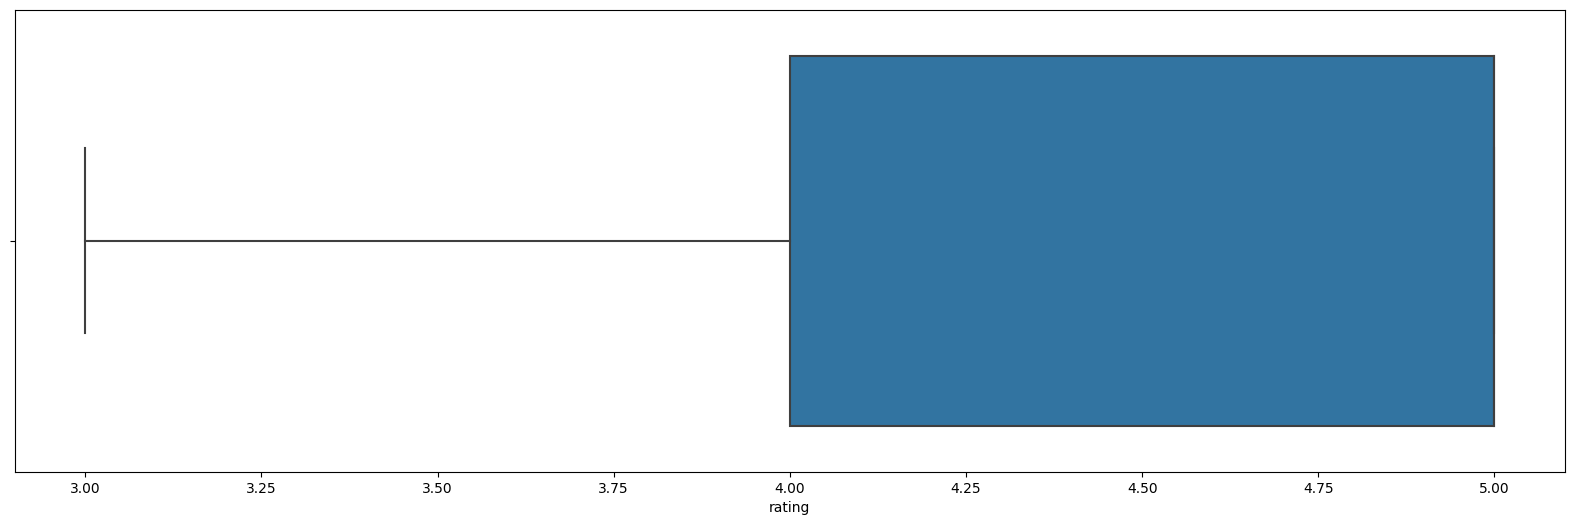

In [ ]:
# Plotting a boxplot of rating
plt.figure(figsize=(20,6))
sns.boxplot(data= df, x='rating')
plt.show()

##### Observations

* The median ratings is same with Maximum and 75 percentile ratings given. This might be connected to the fact that the rating data is markedly skewed to the left.
* The distribution of rating data is unusual and might imply that much attention is not paid to rating their orders by the customers.

#### Analysis of Food_preparation_time against Orders

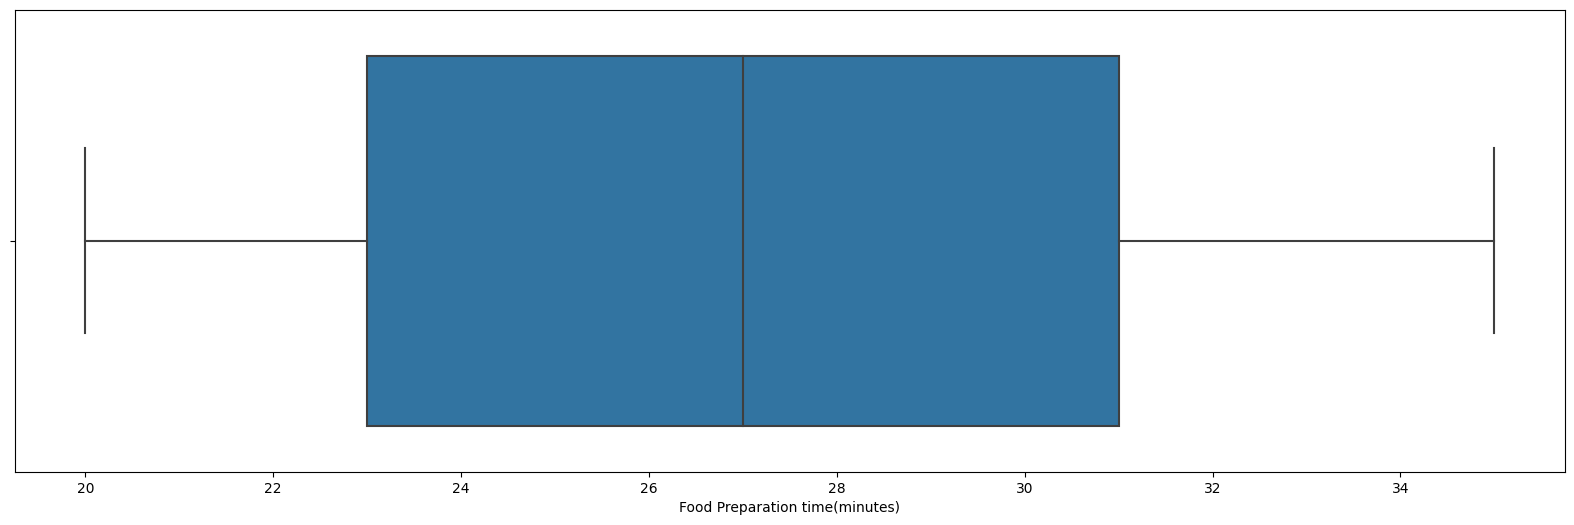

In [ ]:
# Plotting a boxplot distribution of food_preparation_time
plt.figure(figsize=(20,6))
sns.boxplot(data= df, x='food_preparation_time')
plt.xlabel('Food Preparation time(minutes)')
plt.show()

##### Observations

* The data for food preparation time is slightly skewed to the right.
* The median food preparation time is 27 minutes
* 75% of orders were prepared in more than 31 minutes.
* 25% of orders were prepared in less than 23 minutes.

#### Analysis of delivery_time against Orders

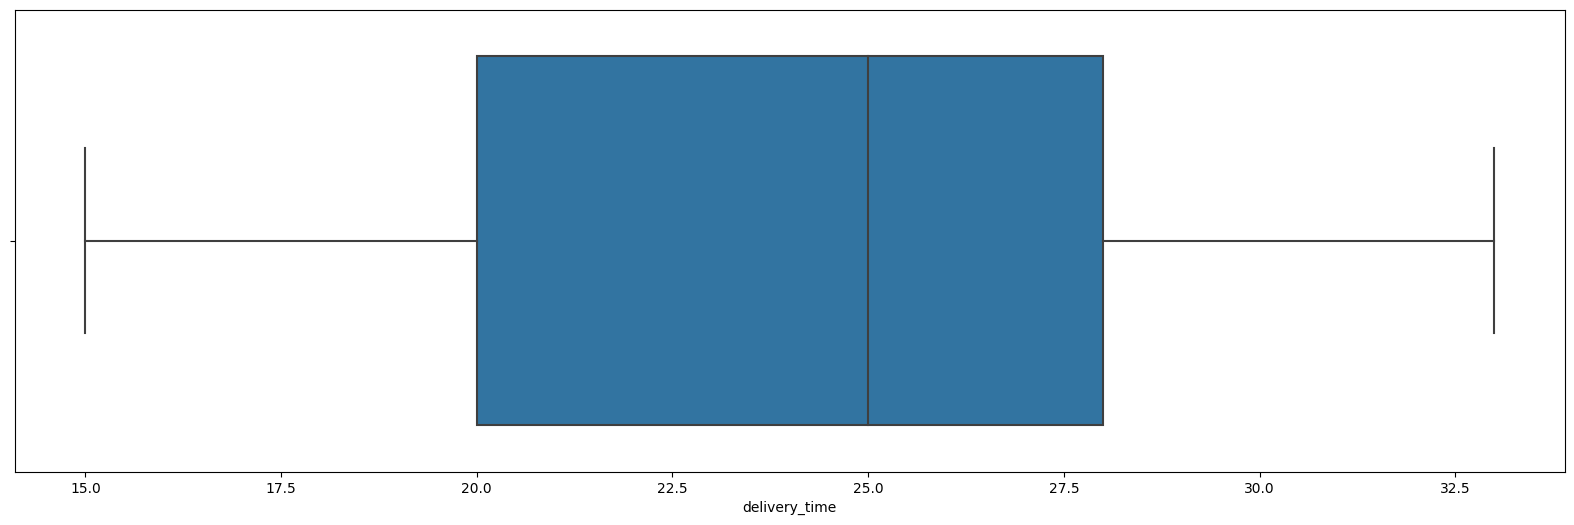

In [ ]:
# Plotting a boxplot distribution of delivery_time
plt.figure(figsize=(20,6))
sns.boxplot(data= df, x='delivery_time')
plt.show()


#### Analysis of Customer ID and Order ID

Both Variables are actually unique identifiers, hence a univariate analysis will not provide any insights.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [77]:
# Checking the top 5 resturants in terms of orders received.
Resturant_ranking = df['restaurant_name'].apply(lambda x: str(x) if isinstance(x, (str, object)) else None).value_counts()

# Display the counts of each unique object
print("Restaurant Order Ranking:");
print(Resturant_ranking);

Restaurant Order Ranking:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


#### Observations:
The top 5 restaurant by orders received include the following:

1. Shake Shack with 219 orders
2. The Meatball Shop clocking in 132 orders
3. Blue Ribbon Sushi receiving 119 orders
4. Blue Ribbon Fried Chicken with 96 orders
5. Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

cuisine_type    day_of_the_week
American        Weekend            415
                Weekday            169
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            207
                Weekday             91
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend         

Text(0.5, 1.0, 'Cuisine Types Ordered by Day of the Week')

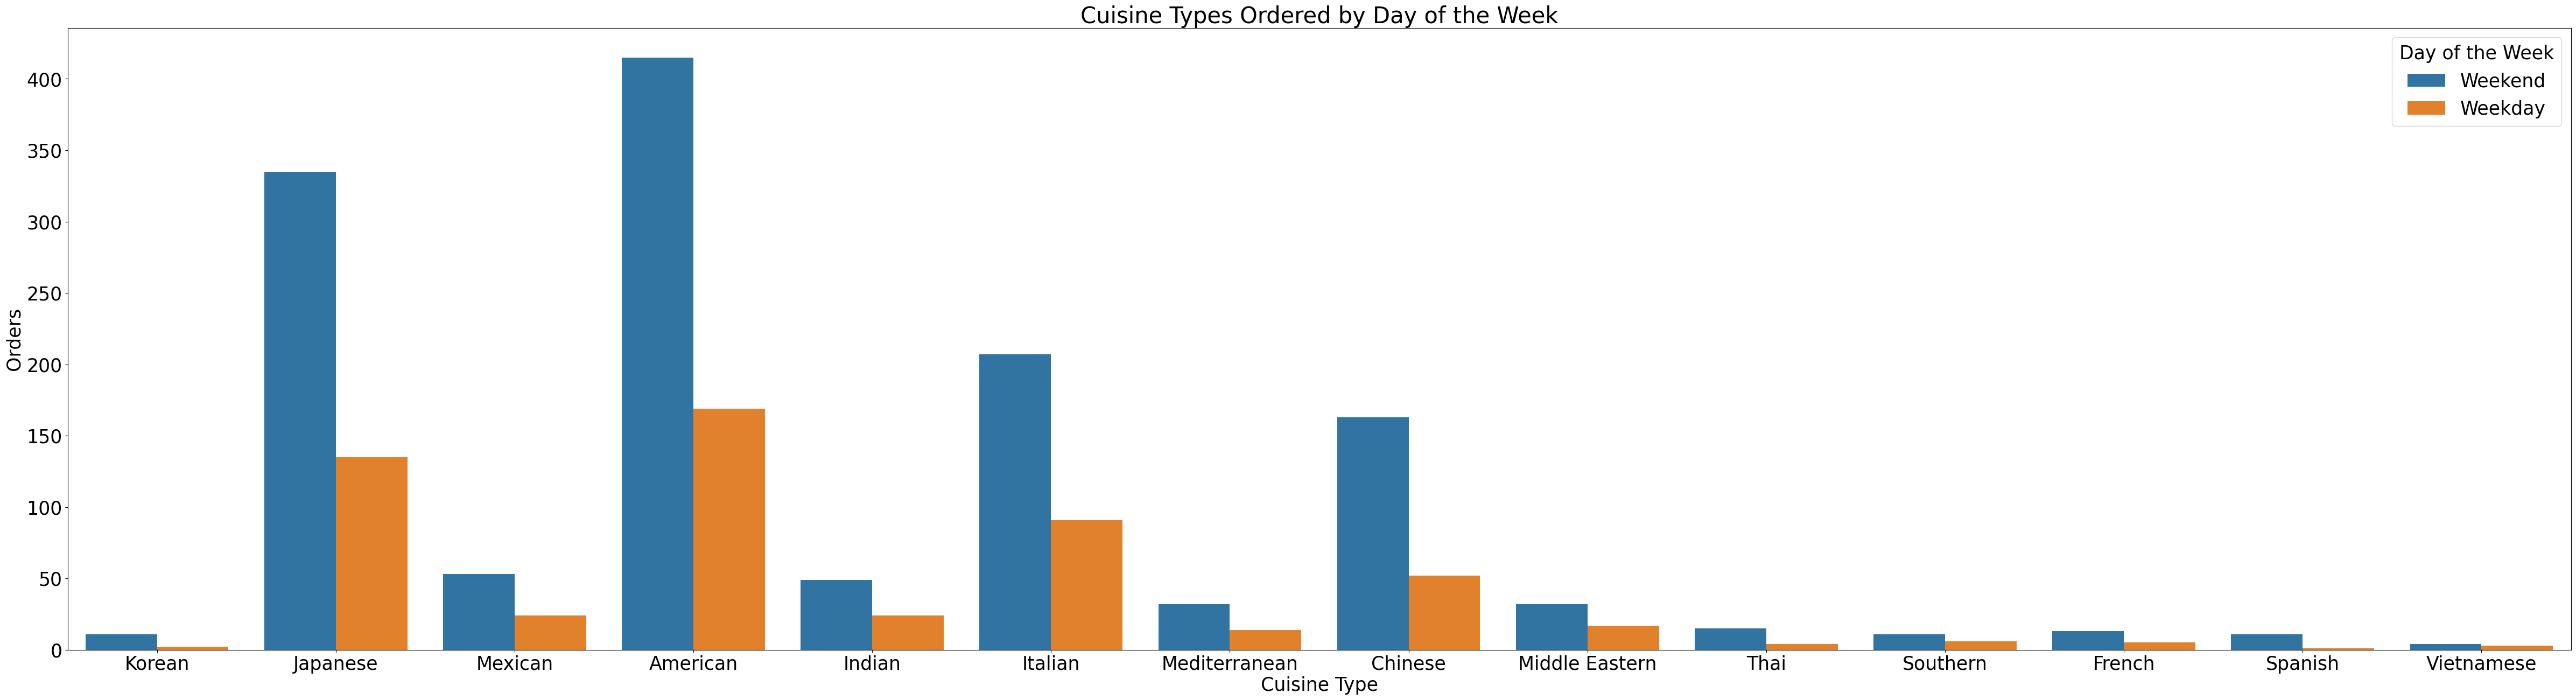

In [ ]:
# Grouping cuisine according to day of the week
top_weekend_cuisines = df.groupby(['cuisine_type'])['day_of_the_week'].value_counts()
print(top_weekend_cuisines)
# Visualizing Cuisine ordered according to day of the week
plt.figure(figsize=(60,15))
sns.countplot(data= df, x= 'cuisine_type', hue='day_of_the_week');
plt.xticks(fontsize=25);
plt.yticks(fontsize=25);
plt.xlabel('Cuisine Type', fontsize=25);
plt.ylabel('Orders', fontsize=25);
plt.legend(title='Day of the Week', title_fontsize='25', fontsize='25');
plt.title('Cuisine Types Ordered by Day of the Week', fontsize=30)


#### Observations:
* The most popular Cuisine ordered during weekends was 'American' getting over 400 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculate the percentage of orders greater than $20
Order_over_20_dollars = df[df['cost_of_the_order'] > 20]
percentage_Order_over_20_dollars = (len(Order_over_20_dollars) / len(df)) * 100

# Display the result
print("\nPercentage of Orders Greater Than $20: {:.2f}%".format(percentage_Order_over_20_dollars))


Percentage of Orders Greater Than $20: 29.24%


#### Observations:
* There are 29.24% of orders costing more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean order delivery time
mean_d_T = df['delivery_time'].mean()
# Display the result
print("\nMean Order Delivery time is",(mean_d_T),"minutes")


Mean Order Delivery time is 24.161749209694417 minutes


#### Observations:
* It takes on the average 24 minutes for ready orders to be delivered to the customers.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
from collections import Counter

# List of customer IDs
customer_ids = df['customer_id']

# Count the occurrences of each customer ID
customer_counts = Counter(customer_ids)

# Find the top 3 most frequent customers
top_customers = customer_counts.most_common(3)

# Display the results
for customer_id, order_count in top_customers:
     print(f"Customer ID: {customer_id}, Number of Orders: {order_count}")

Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


#### Observations:
* The top 3 customers based on orders placed include:

1. Customer ID: 52832 with 13 orders
2. Customer ID: 47440 with 10 orders
3. Customer ID: 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Analysing the relationship between all Numerical variables

<ipython-input-78-d7d98132585a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);


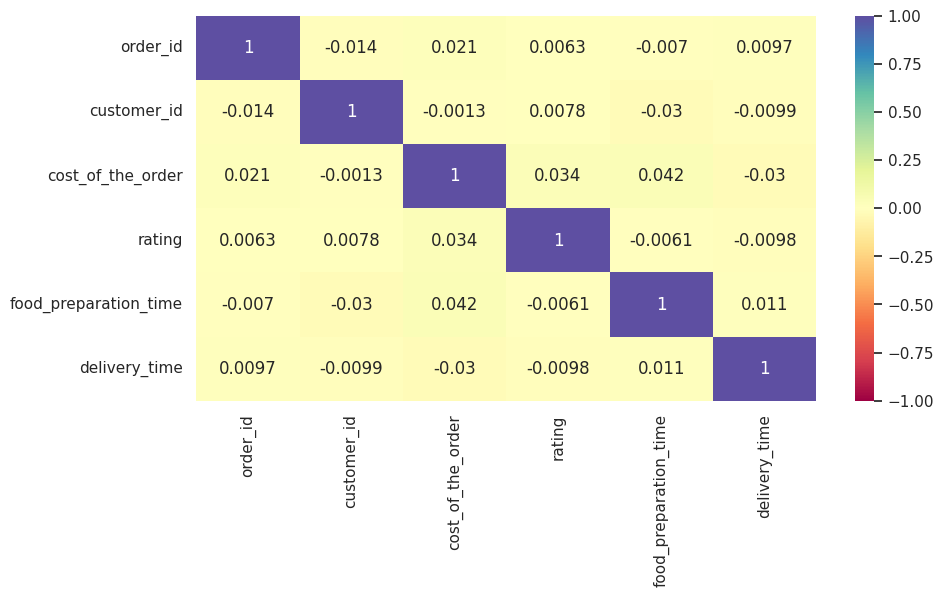

In [78]:
# Exploring correlation between Numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);
plt.show()

##### Observations

* Most correlations between numerical data in the dataset were generally weak.
* Cost of order and preparation time had the highest positive correlation which might imply restaurants spend a little more time preparing meals with higher cost order.

#### Exploring relationship between Day of the week and cost of order

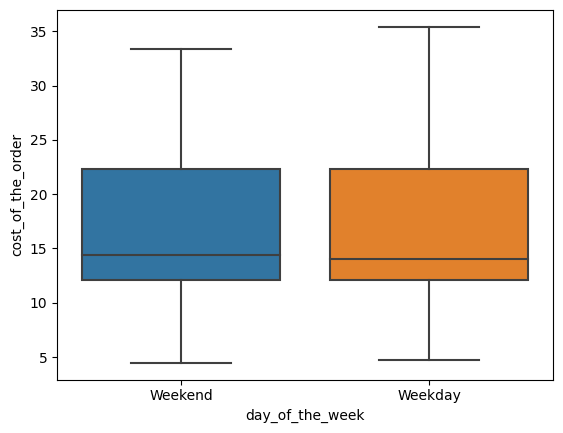

In [ ]:
# Visualizing the relationship between Day of the week and cost of order
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order');


##### Observations

* Cost of orders during the weekend is slightly higher than cost of orders during the weekdays. It might be related higher tendecy to buy food for friends and families as result of socializing.
* The maximum cost of orders was slightly higher during the weekdays than weekends.

####Exploring relationship between food_preparation_time and restaurant_name

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


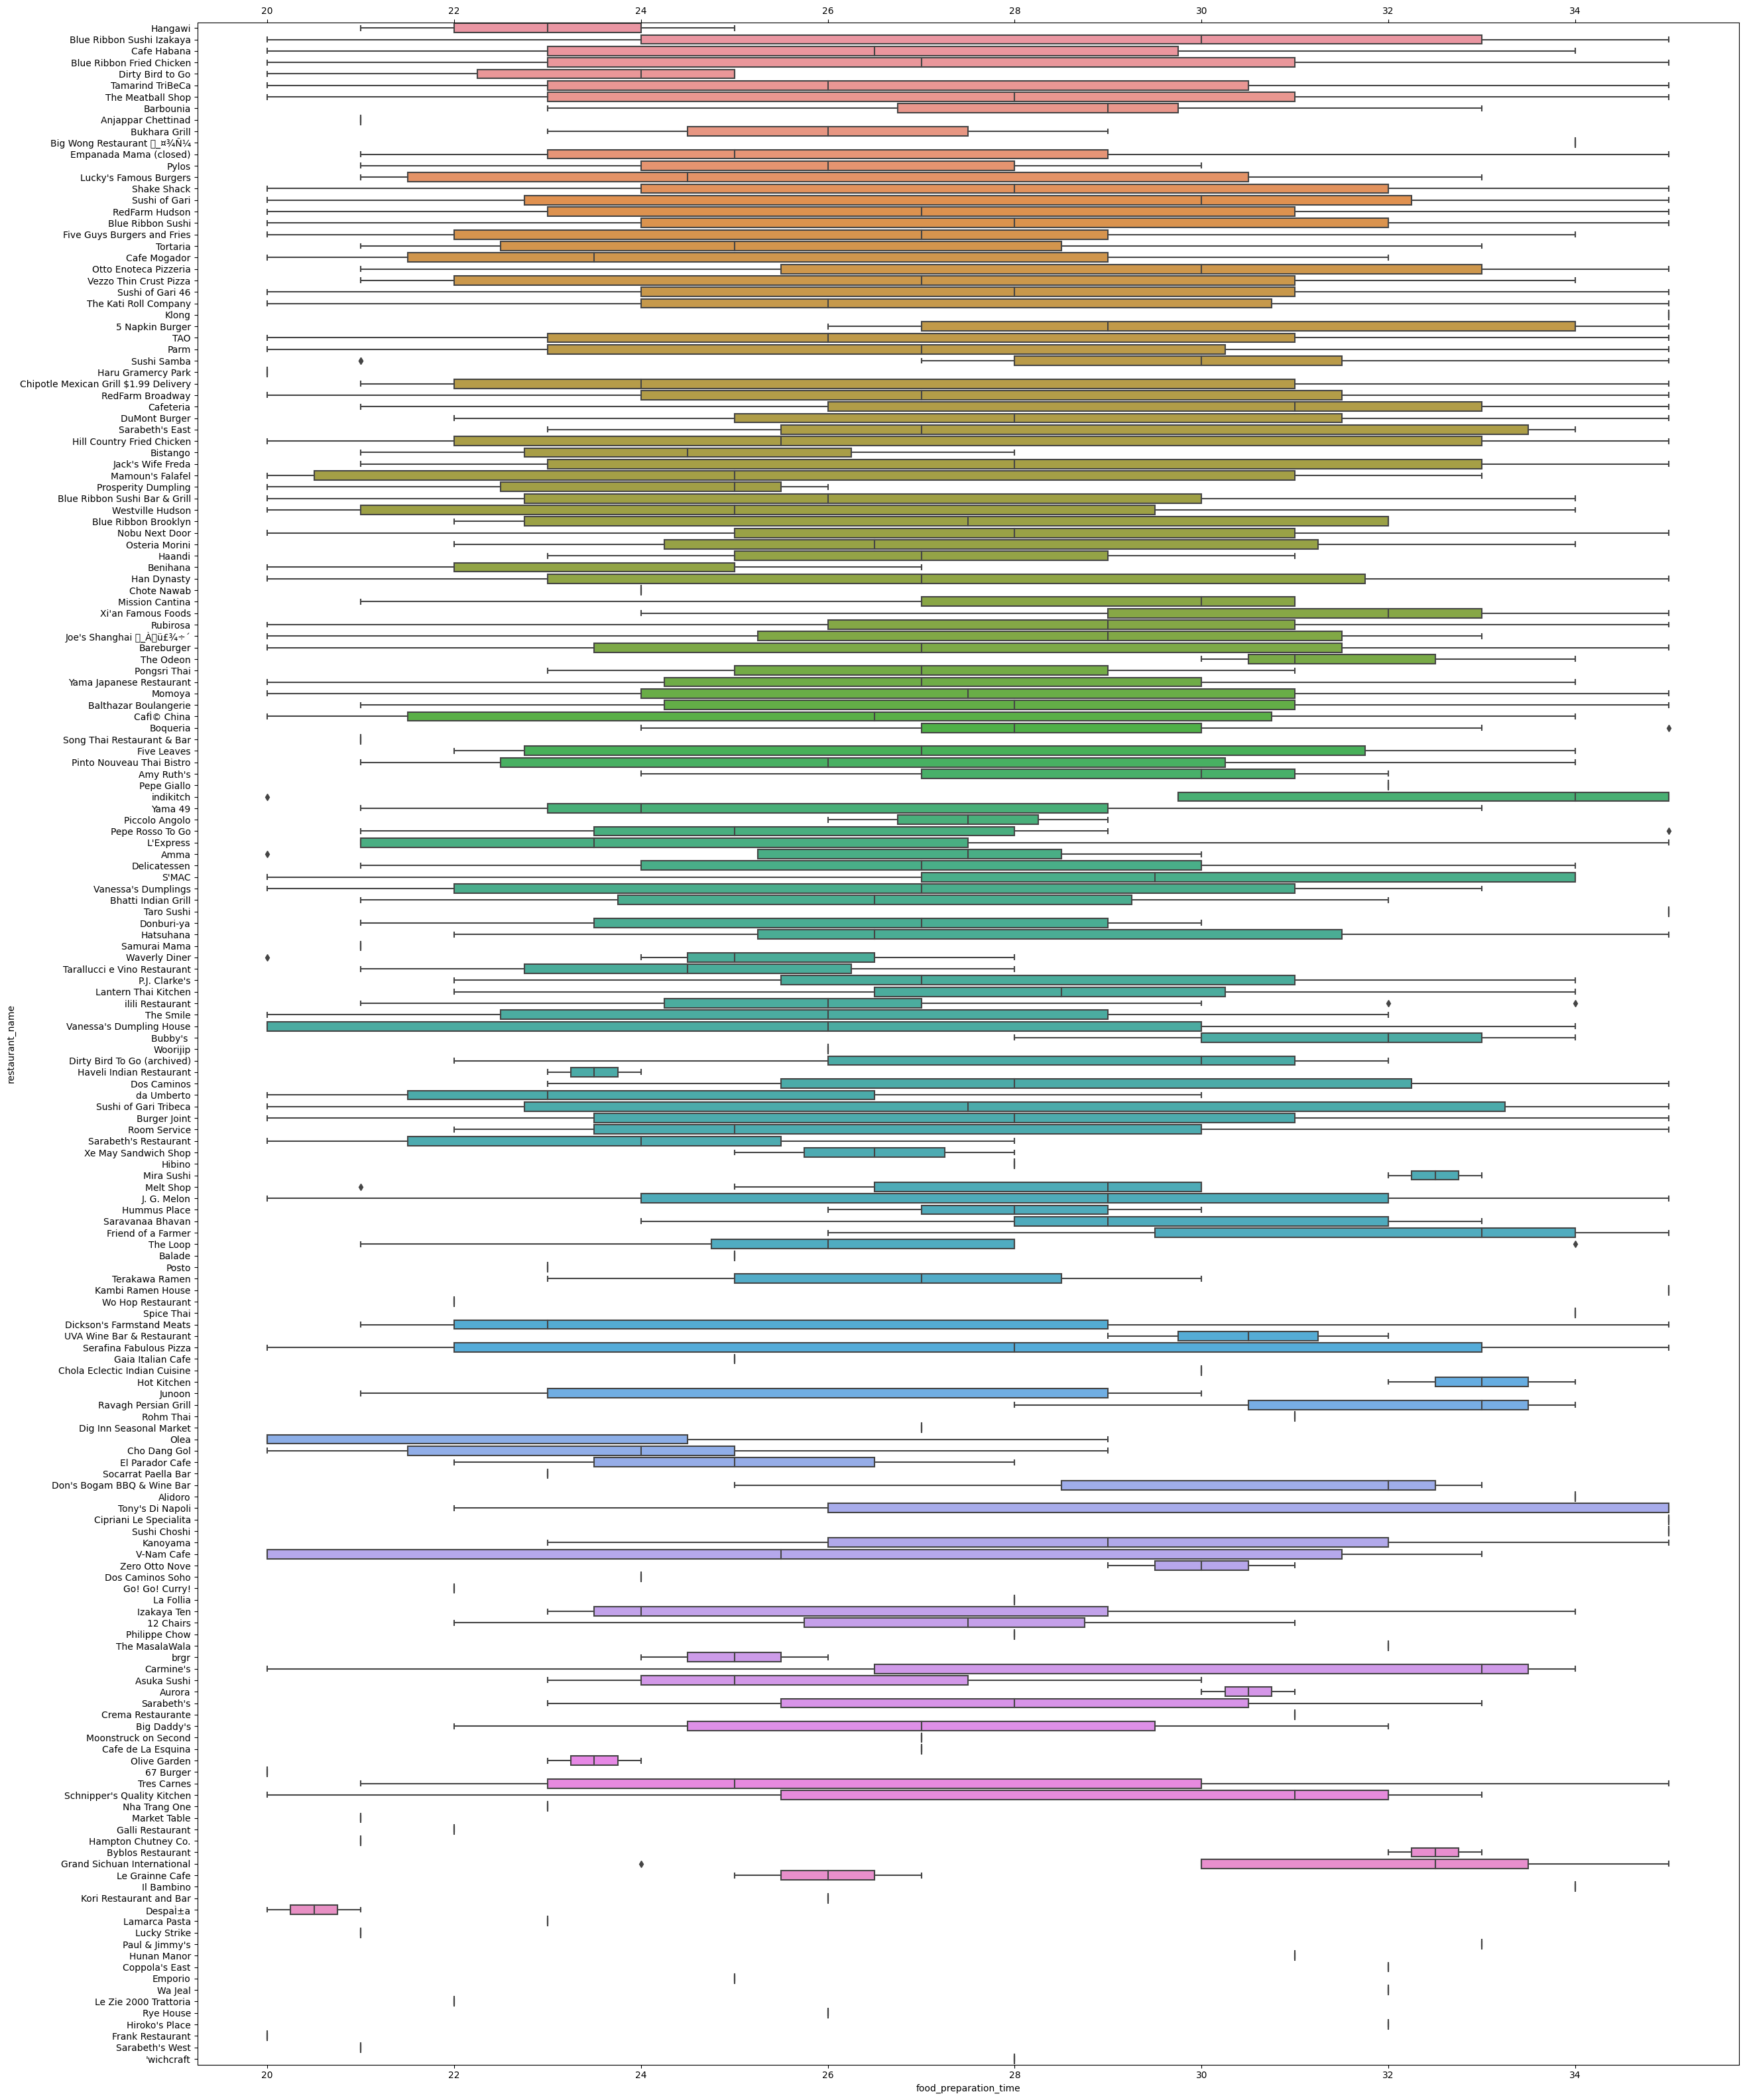

In [ ]:
# Visualizing relationship between food_preparation_time and restaurant_name
plt.figure(figsize=(30, 40))
sns.boxplot(data=df, x='food_preparation_time', y='restaurant_name')
# Set x-axis scale at both top and bottom
plt.tick_params(axis='x', which='both', top=True, bottom=True, labeltop=True, labelbottom=True)


##### Obervations

* There are a lot of restaurants with significantly wide range of preparation time. This might be as a result of several factors that require further investigation.

####Exploring relationship between food_preparation_time and day_of_the_week

<Axes: xlabel='food_preparation_time', ylabel='day_of_the_week'>

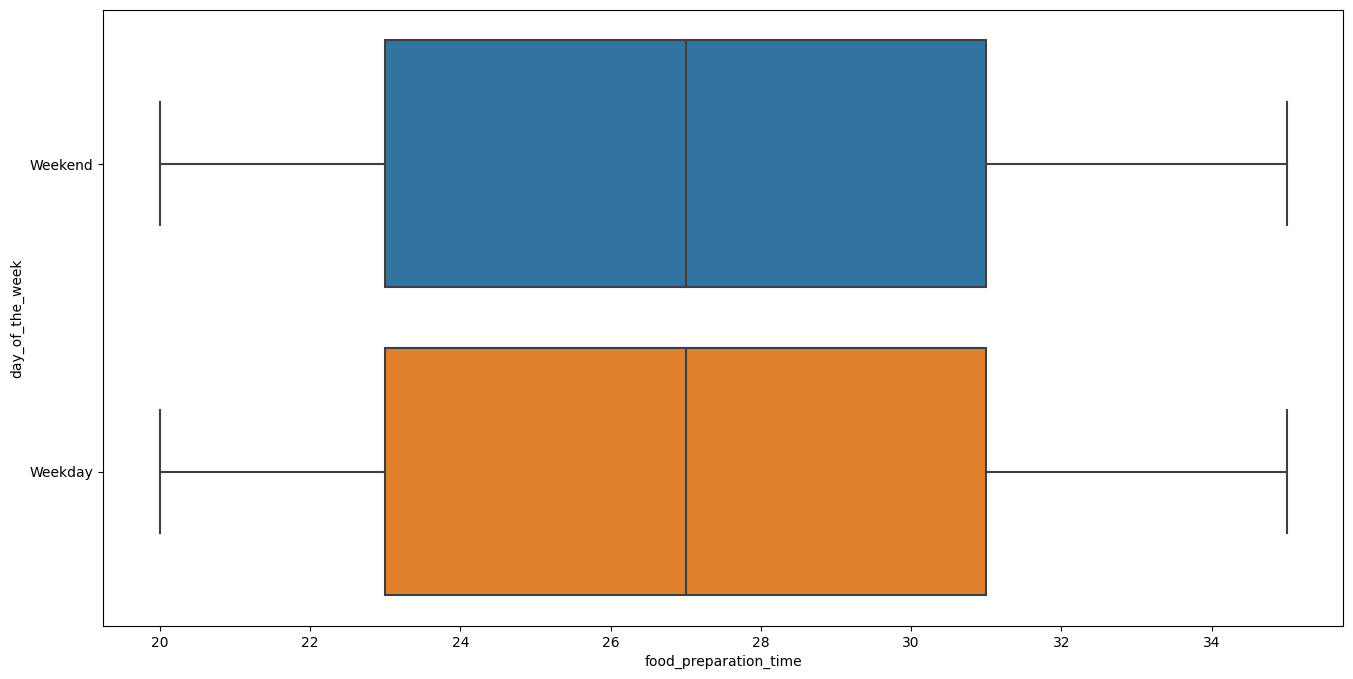

In [ ]:
#Visualizing relationship between food_preparation_time and day_of_the_week
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='food_preparation_time', y='day_of_the_week')

##### Observations

* There is apparently no difference in prepartion time between meals prepared during weekend and those prepared in the weekdays.

####Exploring relationship between delivery time and day_of_the_week

<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

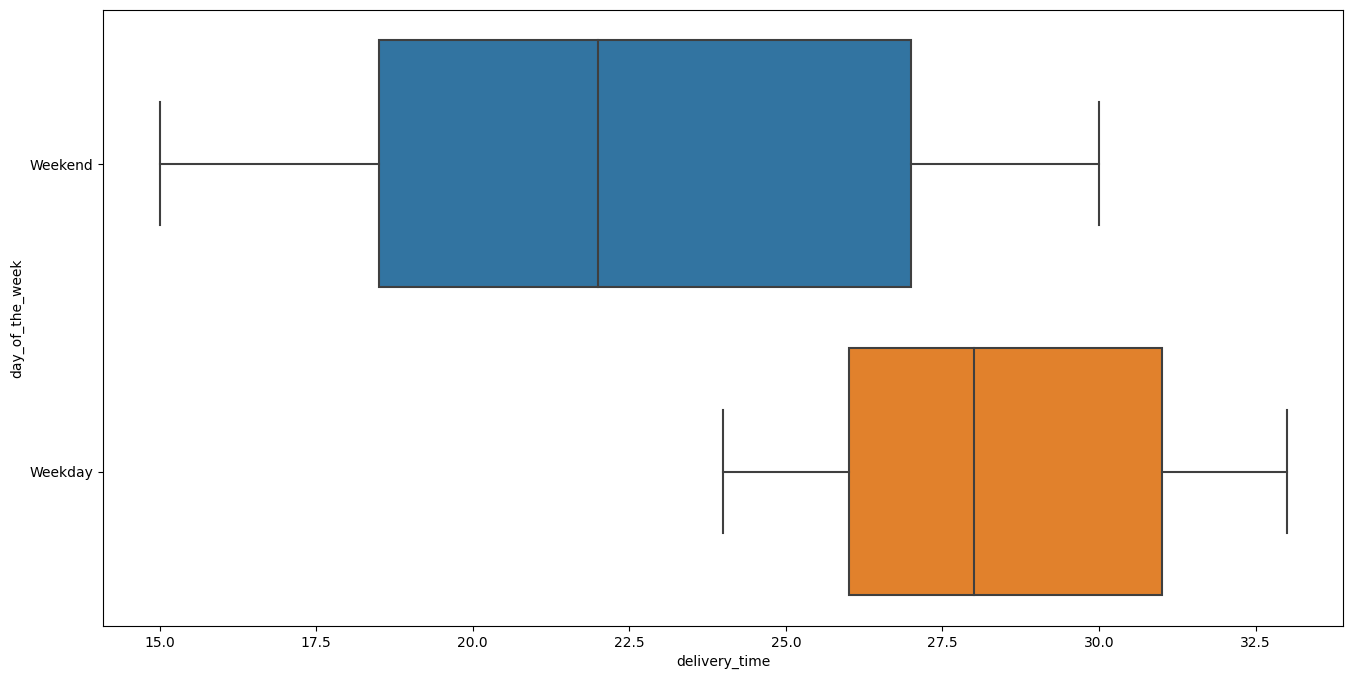

In [ ]:
#Visualizing relationship between delivery_time and day_of_the_week
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')

##### Observations

* The Median delivery time is higher during weekdays compared to weekdays. This might be related to chances of having more traffic congestion during weekdays due to offices been open.

#### Analysing distribution of day_of_the_week orders were made in relationship to cuisines ordered

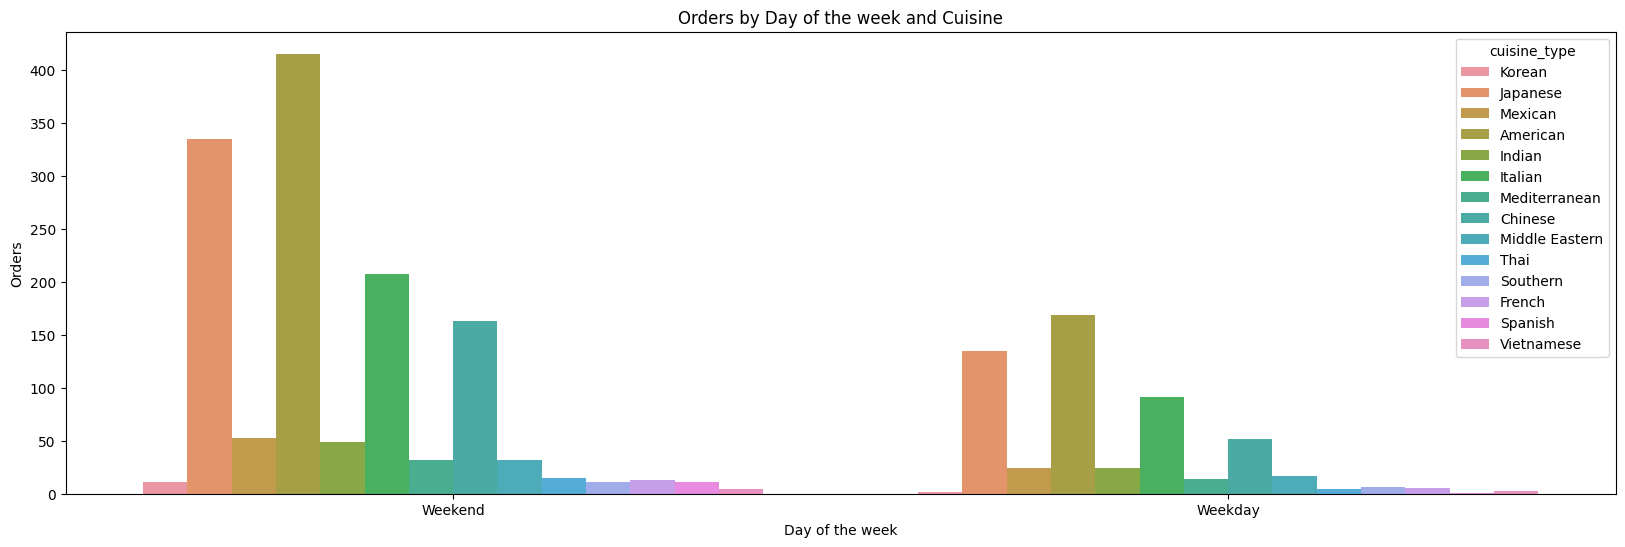

In [ ]:
#Plotting a barplot of distribution of day_of_the_week orders were made in relationship to cuisines ordered
plt.figure(figsize=(20,6))
sns.countplot(data= df, x='day_of_the_week', hue='cuisine_type')
plt.ylabel('Orders');
plt.xlabel('Day of the week');
plt.title('Orders by Day of the week and Cuisine')
plt.show()

##### Observations

* There were marginally more orders during weekends than weekdays accross almost all the cuisine categories.
* American cuisines was the most popular in both periods of the week.

####Exploring relationship between food_preparation_time and cuisine_type

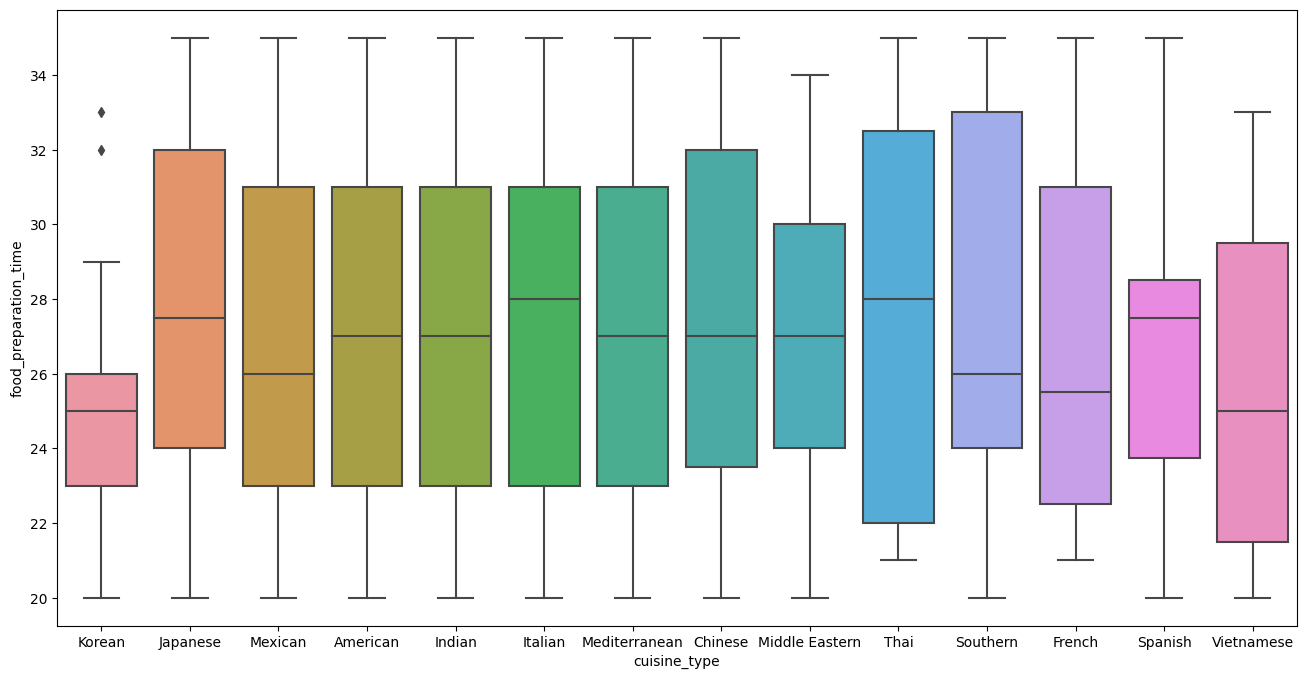

In [ ]:
# Visualizing relationship between food_preparation_time and cuisine_type
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time');

##### Observations

* All the cuisines had marginally close maximum and minimum preparation time. About plus or minus 2 minutes.
* Italian and Thai meals have the highest median preparation time of about 28 minutes.
* While Korean and Vietnamese meals have the least median preparation time of about 25 minutes.

#### Exploring the relationship between food_preparation_time and cost_of_the_order

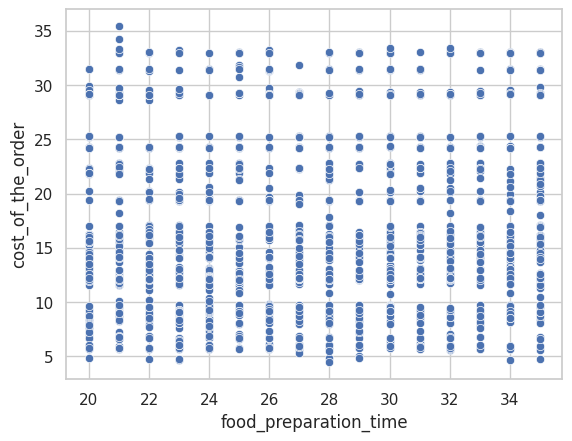

In [72]:
# Visualizing the relationship between food_preparation_time and cost_of_the_order
sns.scatterplot(data=df, x='food_preparation_time', y='cost_of_the_order');

#### Observation

* From the above chart there is no significant relationship between food preparation time and cost of order.
* This is likely an indication that the relationship commented earlier when analysing on correlation heatmap might be insignificant.

#### Analysing relationship between Cusine type and rating


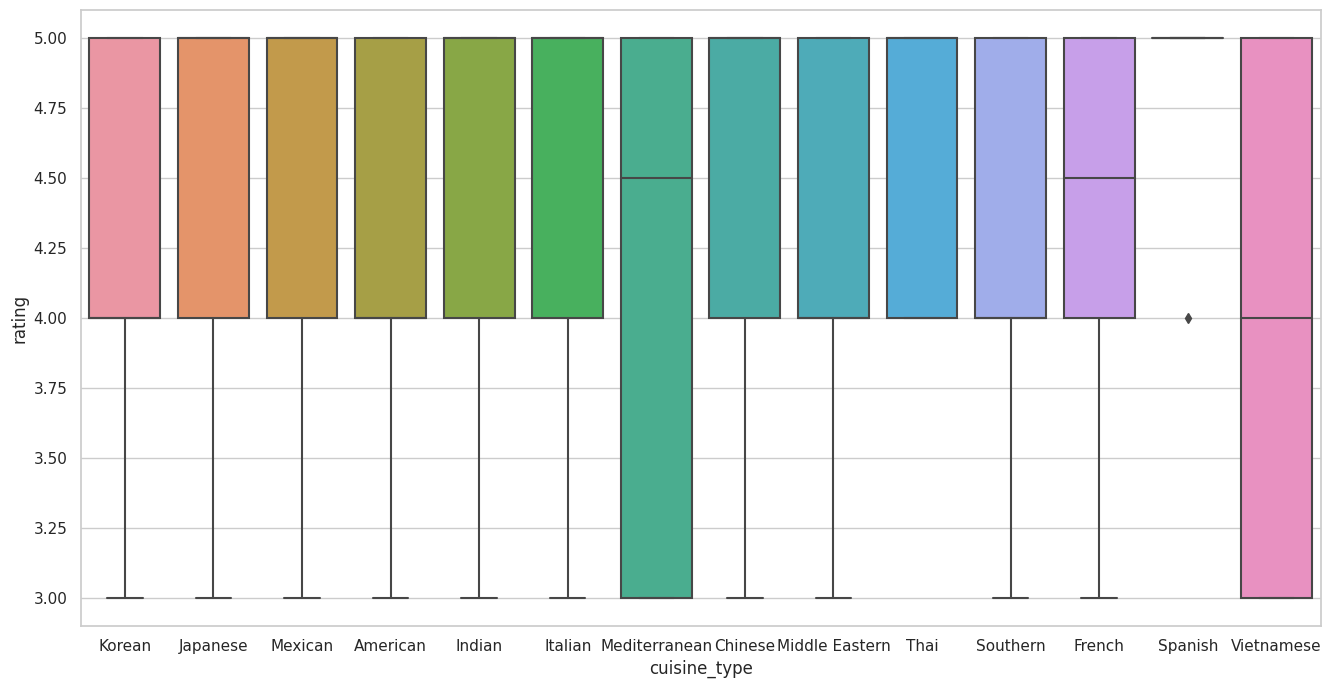

In [ ]:
# Visualizing relationship between rating and cuisine_type
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='cuisine_type', y='rating');

##### Observation

* 11 of 14 cuisines had median ratings similiar with max rating. This phenomenon is as a result of most orders carrying the highest rating. This may speak to the fact the customers do not pay much attention in rating there orders and are just giving arbitary ratings.
* However, Vietnamese cuisines carried the least median rating of 4. Considering Customers are not paying much attention to rating, yet Vietnames meals still carry low median rating. Then, if quality of ratings improve, Vietnamese cuisines might have even lower median ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Grouping restaurants by Rating
restaurant_rating = df.groupby(['restaurant_name'])['rating'].value_counts().reset_index(name='count')

# Grouping restaurants according to ratings > 4 and at least 50 ratings
grouped_restaurants = restaurant_rating[
    (restaurant_rating['rating'] > 4) & (restaurant_rating['count'] >= 50)
]

for restaurant, ratings in grouped_restaurants.groupby('restaurant_name'):
    print(f"Restaurant: {restaurant}")
    print(f"Ratings: {ratings['rating'].tolist()}")
    print()

print("The following restaurant has received at least 50 order ratings and was rated greater than 4:","\n",filtered_restaurants,'\n', "Hence, they are eligible for promotional offers.")

Restaurant: Shake Shack
Ratings: [5.0]

Restaurant: The Meatball Shop
Ratings: [5.0]

The following restaurant has received at least 50 order ratings and was rated greater than 4: 
        restaurant_name  rating  count
208        Shake Shack    5.00     60
237  The Meatball Shop    5.00     53 
 Hence, they are eligible for promotional offers.


#### Observations:
* Shack Shack restaurant and The Meatball Shop met the minimum criteria to be offered a promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [80]:
def calculate_net_revenue(cost_of_the_order):
    total_net_revenue = 0

    for cost in cost_of_the_order:
        if cost > 20:
            net_revenue = 0.25 * cost
        elif 5 < cost <= 20:
            net_revenue = 0.15 * cost
        else:
            net_revenue = 0  # No charge for orders $5 or less

        total_net_revenue += net_revenue

    return total_net_revenue



# Calculate net revenue
total_net_revenue = calculate_net_revenue(cost_of_the_order)

# Display the result
print(f'Total Net Revenue: ${total_net_revenue:.2f}')

Total Net Revenue: $15.25


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Creating new Column for Total required time
df['Total_time_required']= df['food_preparation_time'] + df['delivery_time']

# Analysing percentage of orders which required more than 60 minutes from preparation to delivery.
percentage_above_60_minutes = (df[df['Total_time_required'] > 60].shape[0] / df.shape[0]) * 100
print(f"{percentage_above_60:.2f}%", "of oders needed more than 60 minutes from time of order to time of delivery.")


10.54% of oders needed more than 60 minutes from time of order to time of delivery.


#### Observations:
* 10.54% of orders needed more than 60 minutes from time of order to delivery. This is not too bad, however there is room for improvement.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Grouping delivery time by Day of the week.
mean_by_day_of_week = df.groupby(['day_of_the_week']).mean()

for index, row in mean_by_day_of_week.iterrows():
    day_of_the_week = index  # Assuming 'day_of_the_week' is the index
    mean_count = row['delivery_time']  # Assuming 'delivery_time' is the column you want the mean for
    print(f"day_of_the_week: {day_of_the_week}")
    print(f"mean_count: {mean_count:.2f}", "minutes")
    print()

day_of_the_week: Weekday
mean_count: 28.34 minutes

day_of_the_week: Weekend
mean_count: 22.47 minutes



<ipython-input-60-ec03afe7fbb2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_day_of_week = df.groupby(['day_of_the_week']).mean()


#### Observations:
* Average delivery times during the week days is 28.34 minutes while its 22.47 minutes during the weekend.
* The possible cause of the this difference in averages of over 5 minutes, may be as a result lesser traffic congestion during the weekends from offices being closed. Thus, leading to faster deliveries over the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are significantly more Orders during the weekends than weekdays this may because people at home more and tend to socialize more with friends and families over their favourite meals.
*  Deliveries take marginally more time during week days compared to weekends, this may be as result of likelihood of traffic congestion during weekdays due to higher business activities.
* American cuisines were the favorite cuisines among customers while Vietnamese cuisines ranked the least favourite.
* Shack Shack restaurant was the most popular resturant based on orders.
* More than 50% of orders were not rated, while a large number of those rated carried the highest rating. This is unusual and may point to very low motivation by customers to rate their orders.

### Recommendations:

*  Incentivize customers who rate their orders with discount vouchers on their next order.
* Include warnings on the app about longer delivery times when anticipated.
* Run more promotional offers for least ordered meals so more people could try them out.
* Do more investigation to ascertain factors making Shack Shack Restaurant so successful, and using those factors to drive sales in other restaurants.
* Provide more promotional discounts during weekdays to drive up orders.
* Provide promotional offers during weekends geared towards more social-based orders.

---